In [242]:
import os
import re
import pandas as pd
import pathlib
import scipy.stats as stats
import numpy

In [243]:
def parse_info(line_array, infoIndex):
    
    dict_values={'SVTYPE':'NN', 'END':-1, 'CHR2':'', 'SVLEN':0, 'SUPP_VEC':0, 'AF':0.0, 'RE':0}
    
    if(len(line_array)<=infoIndex):
        return dict_values
    
    infoString=line_array[infoIndex]
    info_array = infoString.split(";");
    
    if(len(info_array)<=2):
        return dict_values
    
    for k, v in dict_values.items():
        for item in info_array:
            if(k+"=" in item):
                dict_values[k]=item.replace(k+"=","")
                break
    
    return dict_values

In [270]:
custom_mappings={
    "DEL": "DEL",
    "DELINS": "DEL",
    "DELLINKED": "DEL",
    "INS": "INS",
    "INSLINKED": "INS",
    "INSLINKEDINS": "INS",
    "INV": "INV",
    "INVDELINS": "INV",
    "INVINS": "INV",
    "INVDUP": "INV",
    "INVDEL": "INV",
    "DELINV": "INV",
    "DUP": "DUP",
    "GAIN": "DUP",
    "DUPINS": "DUP",
    "CNV": "DUP",
    "TANDEMDUP": "DUP",
    "TANDEMDUPINV": "DUP",
    "TANDEMLOWDUP": "DUP",
}

sv_file_path = '../../data/DBA2J/calls/r64089e.minimap2_sniffles.vcf'
chr_names=["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","X"]

data = []
all_types = []
af_values = []

with open(sv_file_path, "r") as vcf_file:
    for line in vcf_file:
        line_array=line.strip().split("\t")

        if(len(line_array) <10 or line.startswith("#")):
            continue

        chr1=line_array[0]
        start=int(line_array[1])-1
        info=parse_info(line_array, 7)
        
        vt=line_array[9].split(":")[0]

        end=int(info['END'])-1
        length=abs(int(info['SVLEN']))
        sup_vec=info['SUPP_VEC']

        sv_type = info['SVTYPE'].replace("/","").upper()
        sv_type = custom_mappings.get(sv_type, sv_type)
        af = info['AF']
        reads = info['RE']

        if(info['SVTYPE']=='BND' or chr1 not in chr_names or info['END']==-1):
            continue

        data.append({'type':sv_type, 'len':length, 'reads': reads, 'af': af, 'vt': vt})
        


In [271]:
plot_data = pd.DataFrame(data)
plot_data.to_csv('file.csv',index=False, sep='\t')

<AxesSubplot:xlabel='reads'>

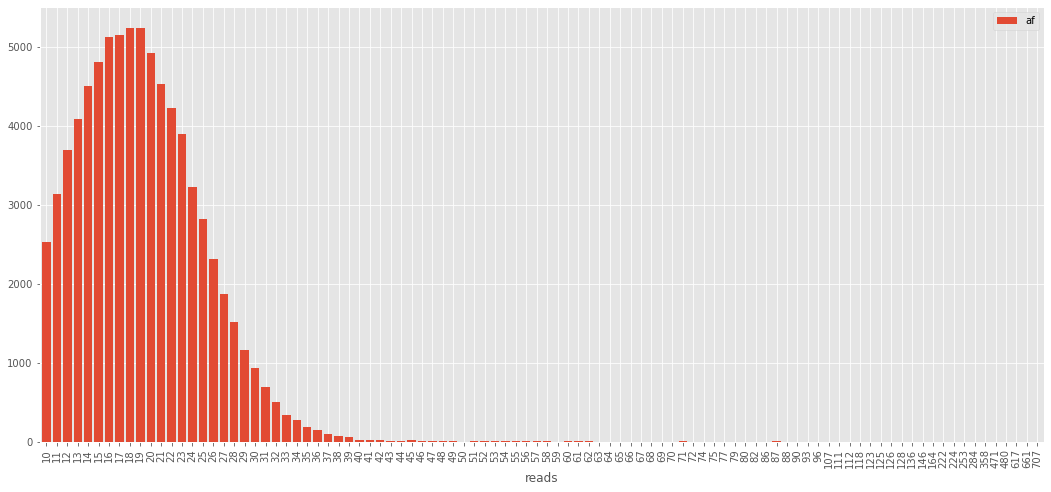

In [245]:
plot_data.groupby("reads").count().sort_index(key=lambda x: x.map(lambda v: int(v))).plot.bar(figsize=(18,8), width=0.8)

In [246]:
dataaf = plot_data['af'].to_numpy(dtype='float32') #numpy.random.random(100)
bins = numpy.linspace(0, 1.0, 20).round(2)
digitized = numpy.digitize(dataaf, bins)
bin_means = [dataaf[digitized == i].size for i in range(0, len(bins))]

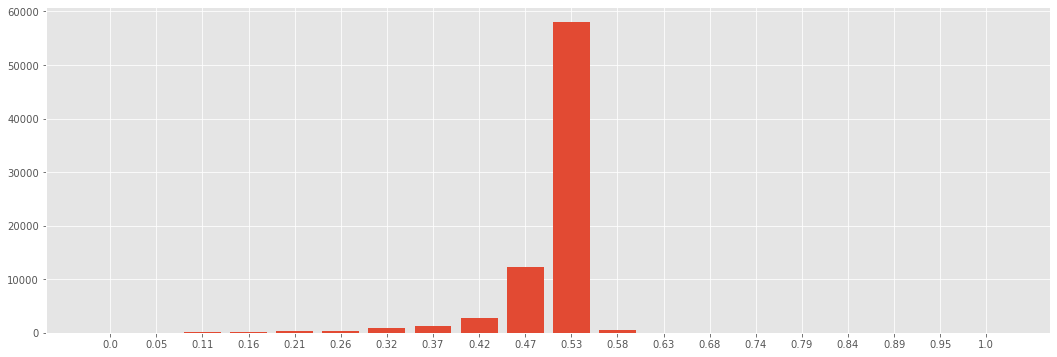

In [247]:
plt.style.use('ggplot')
x = bins
energy = bin_means

x_pos = [i for i, _ in enumerate(x)]

plt.figure(figsize=(18, 6))
plt.bar(x_pos, energy)
plt.xticks(x_pos, x)


plt.show()

In [266]:
plot_data

,len,reads,af,vt
0,2800,12,0.521739,0/1
1,3644,17,0.377778,0/1
2,32,21,0.488372,0/1
3,357,19,0.5,0/1
4,66,12,0.48,0/1
...,...,...,...,...
77495,978,14,0.35,0/1
77496,11226,14,0.225806,0/0
77497,3549,14,0.291667,0/0
77498,2835,14,0.291667,0/0
